## Regression and Logistic Model

In [20]:
import pandas as pd
import numpy as np
import missingno as missing
# Read the data
data = pd.read_csv('data.csv')
Date=pd.DatetimeIndex(data['Date'])
pd.DataFrame(data)
data.MoM=data.MoM.astype(np.float)
data.SP500=data.SP500.astype(np.float)
#NAN 값 행들도 삭제하는 거 생각해보기
data['year']=Date.year
pre_data=data.loc[data.year<2000]
post_data=data.loc[data.year>=2000]
post_data.fillna(post_data.median(), inplace=True)
#data=data.dropna(axis=0, how='any')
post_data.head()

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Date,SP500,MoM,CHINA1,CHINA2,CHINA3,CHINA4,CHINA5,CHINA6,CHINA7,...,USA44,USA45,USA46,USA47,USA48,USA49,USA50,USA51,CRISIS,year
357,2000-01-31,1394.46,-0.050904,99.1,99.0,98.9,154.675,7.4,2658.390,20255000.0,...,65.3,2.3,6.3,54.0,5.8,1.0,12995.555,882.0,1,2000
358,2000-02-29,1366.42,-0.020108,100.2,99.8,99.3,156.100,8.9,8568.355,16782000.0,...,64.9,2.3,1.8,54.0,4.4,-1.0,12864.719,986.0,1,2000
359,2000-03-31,1498.58,0.096720,101.1,100.7,100.2,156.559,12.0,8568.355,14781000.0,...,61.8,2.3,1.8,54.0,4.1,0.4,12916.873,1230.0,0,2000
360,2000-04-30,1452.43,-0.030796,100.1,99.8,99.5,156.820,11.9,2132.990,20138000.0,...,62.8,2.3,-0.6,54.0,4.1,0.6,12990.737,1287.0,1,2000
361,2000-05-31,1420.60,-0.021915,100.1,99.7,99.3,156.846,11.4,8568.355,20513000.0,...,59.1,2.3,1.8,54.0,5.5,1.3,13159.712,882.0,1,2000


In [ ]:
pd.set_option('precision', 3)
pd.set_option('display.width', 400)
print(post_data.describe())

In [2]:
post_data.corr()['SP500'].sort_values(ascending=False)
##data.corr()['SP500'].sort_values(ascending=False)
#print(post_data.corr(method='pearson'))

SP500      1.000000
CHINA12    0.887935
USA22      0.852796
USA50      0.837647
USA4       0.824336
CHINA21    0.802827
USA1       0.802360
USA17      0.797147
CHINA9     0.796991
USA11      0.796866
year       0.787350
CHINA32    0.760829
CHINA29    0.751259
USA19      0.748321
USA41      0.735459
CHINA7     0.728419
CHINA31    0.723397
CHINA30    0.710114
CHINA8     0.695203
USA10      0.679548
USA25      0.663705
CHINA34    0.645122
CHINA4     0.630264
USA7       0.612269
USA26      0.608118
USA33      0.594837
USA44      0.588810
USA34      0.584714
USA12      0.497059
CHINA19    0.494077
             ...   
CHINA11   -0.045388
CHINA39   -0.049614
USA28     -0.055712
CHINA3    -0.058907
USA38     -0.060224
USA40     -0.068217
CHINA33   -0.080535
USA36     -0.087909
USA13     -0.125903
USA46     -0.128810
USA18     -0.128810
CRISIS    -0.138229
CHINA17   -0.141010
CHINA25   -0.141396
USA51     -0.255088
CHINA13   -0.262596
USA15     -0.284726
CHINA10   -0.289931
USA43     -0.331687


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

#plt.scatter(post_data.CHINA5, post_data.SP500, c='red')
#plt.xscale('log')
sns.regplot(post_data.USA11, post_data.SP500, color='B')
plt.xlabel("[USA]Industrial Production Rate")
plt.ylabel("[USA]S&P500 INDEX")

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['font.size'] = 14
# Show histograms
post_data.hist()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
%matplotlib inline

#feature_cols=post_data.columns.values
feature_cols=post_data.columns.values
X=post_data[feature_cols[3:-2]]
Y=post_data.SP500
reg=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
reg.fit(X_train, Y_train)
Y_train_pred=reg.predict(X_train) 
Y_test_pred=reg.predict(X_test)

#Robust Test
train_RMSE=np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
test_RMSE=np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
rsquared_train=reg.score(X_train, Y_train)
rsquared_test=reg.score(X_test, Y_test)

print(reg.intercept_)
pprint(list(zip(X,reg.coef_)))
print(train_RMSE, test_RMSE)
print(rsquared_train, rsquared_test)

## Normalized Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
print(rescaledX)

In [ ]:
reg2 = LinearRegression()
reg2.fit(rescaledX, Y)

print(reg2.intercept_)
print(reg2.coef_)

## LinearRegression by Ridge, Lasso Model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
%matplotlib inline

def train_test_ridge_lasso(data, alpha_value):
    feature_cols=post_data.columns.values
    X=post_data[feature_cols[3:-1]]
    Y=post_data.SP500
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    ridge_model=Ridge(alpha=alpha_value)
    ridge_model.fit(X_train,Y_train)
    
    lasso_model=Lasso(alpha=alpha_value)
    lasso_model.fit(X_train,Y_train)
    
    intercept=ridge_model.intercept_
    intercept2=lasso_model.intercept_
    
    formula=pd.Series(ridge_model.coef_,index=X.columns.values)
    formula2=pd.Series(lasso_model.coef_,index=X.columns.values)

    Y_train_pred=ridge_model.predict(X_train)
    Y_test_pred=ridge_model.predict(X_test)
    
    Y_train_pred2=lasso_model.predict(X_train)
    Y_test_pred2=lasso_model.predict(X_test)
    
    # Robust test for Data Expectation
    rmse_train=np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
    rmse_test=np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
    
    rmse_train2=np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred2))
    rmse_test2=np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred2))
    
    
    # Degree of model Robustness
    rsquared_train=ridge_model.score(X_train, Y_train)
    rsquared_test=ridge_model.score(X_test, Y_test)
    
    rsquared_train2=lasso_model.score(X_train, Y_train)
    rsquared_test2=lasso_model.score(X_test, Y_test)
    
    
    # Make result dictionary
    result={'formula':formula, 'intercept':intercept, 'rmse_train':rmse_train, 'rmse_test':rmse_test,
           'rsquared_train':rsquared_train, 'rsquared_test':rsquared_test}
    

    result2={'formula':formula2, 'intercept':intercept2, 'rmse_train':rmse_train2, 'rmse_test':rmse_test2,
           'rsquared_train':rsquared_train2, 'rsquared_test':rsquared_test2}
    
    
    return result, result2

In [ ]:
train_test_ridge_lasso(post_data, 4)

In [ ]:
import seaborn as sns
sns.pairplot(post_data, height=3,palette="husl", x_vars=["USA4","USA22","USA11", "USA7", "CHINA12"],y_vars=["SP500"],diag_kind="kde",kind="reg")
plt.show()

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['SP500'], data['CHINA12'], data['USA22'], c='b', marker='o', alpha = 1.0)

ax.set_xlabel('CHINA12')
ax.set_ylabel('USA22')
ax.set_zlabel('SP500')

plt.show()

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

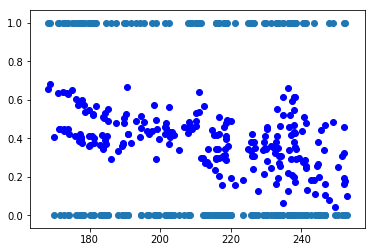

In [115]:
#Logistic Regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data.csv')

Date=pd.DatetimeIndex(data['Date'])
pd.DataFrame(data)
data.MoM=data.MoM.astype(np.float)
data.SP500=data.SP500.astype(np.float)
data['year']=Date.year
pre_data=data.loc[data.year<2000]
post_data=data.loc[data.year>=2000]
post_data.fillna(post_data.median(), inplace=True)
feature_cols=post_data.columns.values

X=post_data[feature_cols[3:-2]]
#X=post_data[['USA19','CHINA2']]
Y=post_data.CRISIS
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
logreg=LogisticRegression()
#logreg.fit(X_train,Y_train)
logreg.fit(X,Y)
post_data['CRISIS_pred']=logreg.predict(X)
post_data['CRISIS_pred_proba']=logreg.predict_proba(X)[:,1]
plt.scatter(post_data.USA19, post_data.CRISIS)
plt.scatter(post_data.USA19, post_data.CRISIS_pred_proba, color='blue')

In [116]:
logreg.fit(X_train, Y_train)
post_data['crisis_pred']=logreg.predict(X)
post_data['crisis_pred_prob']=logreg.predict_proba(X)[:,1]
from pprint import pprint
from sklearn import metrics
Y_pred_prob=logreg.predict_proba(X_test)[:,1]
Y_pred=logreg.predict(X_test)
pprint(list(zip(X, logreg.coef_[0])))
print(metrics.accuracy_score(Y_test, Y_pred))
#print(metrics.accuracy_score(y_pred_prob, y_test))

[('CHINA1', 2.2610179270716368e-08),
 ('CHINA2', 2.2745550841302206e-08),
 ('CHINA3', 2.3920998849616996e-08),
 ('CHINA4', 5.575736669868283e-06),
 ('CHINA5', -1.4843191170094427e-08),
 ('CHINA6', 8.64701228485843e-06),
 ('CHINA7', 5.4107017641487384e-08),
 ('CHINA8', -3.9122954258718555e-08),
 ('CHINA9', -2.6522131969718144e-05),
 ('CHINA10', -1.2058266323137011e-08),
 ('CHINA11', -6.957979858108005e-10),
 ('CHINA12', -2.2655067349530384e-05),
 ('CHINA13', 2.2888843537594075e-09),
 ('CHINA14', 2.1300862704936856e-06),
 ('CHINA15', 7.320564071288382e-09),
 ('CHINA16', 3.752544633128236e-08),
 ('CHINA17', -1.3209921156148808e-08),
 ('CHINA18', -1.7952093999971824e-08),
 ('CHINA19', 1.6797416275501302e-06),
 ('CHINA20', 5.913881504479471e-08),
 ('CHINA21', 6.59142407319995e-05),
 ('CHINA22', 2.867110417611698e-09),
 ('CHINA23', 8.494330549657397e-09),
 ('CHINA24', 1.6370014746644106e-08),
 ('CHINA25', -1.335535026490045e-08),
 ('CHINA26', -2.8526600518039027e-08),
 ('CHINA27', 5.11803393

C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred))

[[32 14]
 [16  7]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        46
           1       0.33      0.30      0.32        23

   micro avg       0.57      0.57      0.57        69
   macro avg       0.50      0.50      0.50        69
weighted avg       0.56      0.57      0.56        69



(array([ 2.,  2.,  4., 11., 14.,  8., 11., 11.,  4.,  2.]),
 array([0.01123495, 0.0851839 , 0.15913285, 0.2330818 , 0.30703075,
        0.3809797 , 0.45492865, 0.52887761, 0.60282656, 0.67677551,
        0.75072446]),
 <a list of 10 Patch objects>)

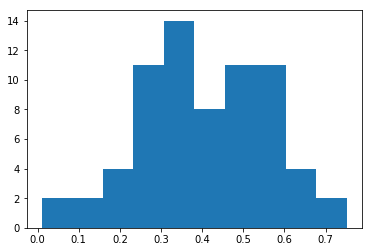

In [126]:
Y_pred_new=np.where(Y_pred_prob>0.6, 1, 0)
%matplotlib inline
plt.hist(Y_pred_prob)

In [127]:
print(metrics.confusion_matrix(Y_pred_new,Y_test))

[[41 22]
 [ 5  1]]


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
clf=LogisticRegression(C=1)
Y_prob=clf.fit(X_train, Y_train).predict_proba(X_test)
Y_score=clf.fit(X_train, Y_train).decision_function(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_score)
roc_auc=auc(fpr, tpr)
print(roc_auc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Decision Tree Model and Random Forest
WebGraphviz.com

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
# Read the data
data = pd.read_csv('data.csv')

Date=pd.DatetimeIndex(data['Date'])
pd.DataFrame(data)
data.MoM=data.MoM.astype(np.float)
data.SP500=data.SP500.astype(np.float)

data['year']=Date.year
pre_data=data.loc[data.year<2000]
post_data=data.loc[data.year>=2000]
post_data.fillna(post_data.median(), inplace=True)

C:\Users\infomax\davidyoon\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [110]:
feature_cols=post_data.columns.values
X_grid_selector=['USA13','USA29','CHINA29','USA20','USA39','CHINA2','CHINA9','USA28','USA3']
X=post_data[X_grid_selector]
#X=post_data[feature_cols[3:-2]]
#X=X_selector
Y=post_data.CRISIS
#X=X.drop(['UNRPE','UTR'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.375, random_state=123)

## Decision Tree Model

depth_set=[1,2,3,4,5,6,7,8,9,10]
train_accuracy_set=[]
accuracy_set=[]
cm_set=[]
dt_models=[]


for depth in depth_set:
    
    dt=DecisionTreeClassifier(max_depth=depth,random_state=123)
    dt.fit(X_train,Y_train)
    y_train_hat=dt.predict(X_train)
    y_val_hat=dt.predict(X_val)
    y_test_hat=dt.predict(X_test)
    
    train_accuracy=metrics.accuracy_score(Y_train, y_train_hat)
    accuracy=metrics.accuracy_score(y_val_hat,Y_val)
    cm=metrics.confusion_matrix(y_val_hat, Y_val)
    
    train_accuracy_set.append(train_accuracy)
    accuracy_set.append(accuracy)
    cm_set.append(cm)
    dt_models.append(dt)
    

## Random Forest Model

n_estimators_set=[1,2,3,4,10]
max_depth_set=[5,7,9,11]
max_features_set=['auto','log2']

rf_models=[]
rf_models_test=[]
rf_accuracy_set=[]
rf_accuracy_set_test=[]
rf_cm_set=[]
rf_cm_set_test=[]

for n_estimators in n_estimators_set:
    for max_depth in max_depth_set:
        for max_features in max_features_set:
            
            rf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
            rf.fit(X_train, Y_train)
            y_train_hat=rf.predict(X_train)
            y_test_hat=rf.predict(X_test)
            rf_accuracy=metrics.accuracy_score(Y_train, y_train_hat)
            rf_accuracy_test=metrics.accuracy_score(Y_test, y_test_hat)
            rf_cm=metrics.confusion_matrix(Y_train, y_train_hat)
            rf_cm_test=metrics.confusion_matrix(Y_test, y_test_hat)
            
            rf_models.append(rf)
            rf_accuracy_set.append(rf_accuracy)
            rf_accuracy_set_test.append(rf_accuracy_test)
            rf_cm_set.append(rf_cm)
            rf_cm_set_test.append(rf_cm_test)

In [114]:
#Decision Tree results
max_value=max(accuracy_set)
max_index=accuracy_set.index(max_value)
pprint(accuracy_set)
print("====================================")
pprint(max_value)
pprint(max_index)
print("==========Randomforestresults=======")
pprint(rf_accuracy_set)
print("="*60)
rf_max_value=max(rf_accuracy_set)
rf_max_index=rf_accuracy_set.index(rf_max_value)
rf_max_value_test=max(rf_accuracy_set_test)
rf_max_index_test=rf_accuracy_set_test.index(rf_max_value_test)
print(rf_max_value, rf_max_index)
print(rf_max_value_test, rf_max_index_test)
rf.best


[0.5507246376811594,
 0.5362318840579711,
 0.5652173913043478,
 0.5652173913043478,
 0.5507246376811594,
 0.5362318840579711,
 0.5797101449275363,
 0.5797101449275363,
 0.5942028985507246,
 0.5797101449275363]
0.5942028985507246
8
==========Randomforestresults=======
[0.6991150442477876,
 0.6991150442477876,
 0.7787610619469026,
 0.8230088495575221,
 0.8141592920353983,
 0.8053097345132744,
 0.8053097345132744,
 0.672566371681416,
 0.8141592920353983,
 0.7079646017699115,
 0.8053097345132744,
 0.8053097345132744,
 0.8053097345132744,
 0.8584070796460177,
 0.7964601769911505,
 0.7964601769911505,
 0.831858407079646,
 0.831858407079646,
 0.8495575221238938,
 0.8584070796460177,
 0.8849557522123894,
 0.831858407079646,
 0.9292035398230089,
 0.9469026548672567,
 0.831858407079646,
 0.7964601769911505,
 0.8495575221238938,
 0.8407079646017699,
 0.9026548672566371,
 0.9292035398230089,
 0.9292035398230089,
 0.8938053097345132,
 0.8495575221238938,
 0.831858407079646,
 0.8849557522123894,
 0.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
print(metrics.classification_report(Y_train, y_train_hat))
print(metrics.confusion_matrix(Y_train,y_train_hat))
print("="*200)
print(metrics.classification_report(Y_test, y_test_hat))
print(metrics.confusion_matrix(Y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        65
           1       0.96      0.92      0.94        48

   micro avg       0.95      0.95      0.95       113
   macro avg       0.95      0.94      0.95       113
weighted avg       0.95      0.95      0.95       113

[[63  2]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        36
           1       0.22      0.20      0.21        10

   micro avg       0.67      0.67      0.67        46
   macro avg       0.50      0.50      0.50        46
weighted avg       0.66      0.67      0.67        46

[[29  7]
 [ 8  2]]


In [113]:
#grah
print('총 테스트 개수:%d, 총 오류 개수:%d' %(len(Y_train), ((Y_train !=y_train_hat).sum())))

총 테스트 개수:113, 총 오류 개수:6


In [ ]:
##featrue_engineering -RF importances
pprint(list(zip(X,rf.feature_importances_)))
selector=SelectFromModel(estimator=rf,threshold=0.03,prefit=True)
X_selector=selector.transform(X)
print(X.shape)`
print(X_selector.shape)
print("="*100)
print(X_selector)

In [ ]:
#Recursive feature elimination(RFE)

from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

svc=SVC(kernel='linear')
rfecv=RFECV(estimator=svc, step=1, cv=StratifiedKFold(n_splits=2), scoring='accuracy', verbose=1)
rfecv.fit(X,Y)

Fitting estimator with 97 features.


In [ ]:
selected=["UPPI","CHINA1","CHINA7","CHINA18","CHINA21","CHINA25","CHINA27","CHINA32","CHINA39"]
pd.DataFrame(X_selector, columns=selected).head()

In [ ]:

#X=X_selector

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.375, random_state=123)

for n_estimators in n_estimators_set:
    for max_depth in max_depth_set:
        for max_features in max_features_set:
            
            rf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
            rf.fit(X_train, Y_train)
            y_train_hat=rf.predict(X_train)
            
            rf_accuracy=metrics.accuracy_score(Y_train, y_train_hat)
            rf_cm=metrics.confusion_matrix(Y_train, y_train_hat)
            
            rf_models.append(rf)
            rf_accuracy_set.append(rf_accuracy)
            rf_cm_set.append(rf_cm)

In [ ]:
max_value=max(rf_accuracy_set)
max_index=rf_accuracy_set.index(max_value)
print(max_value)
print(max_index)

In [ ]:
missingno.matrix(post_data)
#pd.where(pd.isnull(post_data))

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
#y는 title 과 네모난 표의 크기를 말한다.
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(post_data.iloc[:,3:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Neural_Network_Model, GridSearchCV

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.metrics import confusion_matrix

# Read the data
data = pd.read_csv('data.csv')

Date=pd.DatetimeIndex(data['Date'])
pd.DataFrame(data)
data.MoM=data.MoM.astype(np.float)
data.SP500=data.SP500.astype(np.float)
data['year']=Date.year
pre_data=data.loc[data.year<2000]
post_data=data.loc[data.year>=2000]
post_data.fillna(post_data.median(), inplace=True)
post_data.tail()

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Date,SP500,MoM,CHINA1,CHINA2,CHINA3,CHINA4,CHINA5,CHINA6,CHINA7,...,USA44,USA45,USA46,USA47,USA48,USA49,USA50,USA51,CRISIS,year
580,2018-08-31,2901.52,0.030263,102.1,102.1,102.0,3117.946,6.0,8568.355,215565383.8,...,61.8,2.8,1.8,55.3,3.2,0.6,18657.352,768.0,0,2018
581,2018-09-30,2913.98,0.004294,102.3,102.3,102.3,3109.716,6.1,8568.355,217372208.0,...,66.1,3.2,1.8,54.7,2.9,0.0,18652.553,786.0,0,2018
582,2018-10-31,2711.74,-0.069403,102.4,102.5,102.5,3087.025,5.8,22949.550,226686815.1,...,61.8,3.0,1.8,55.6,2.9,0.2,18685.088,882.0,1,2018
583,2018-11-30,2760.17,0.017859,102.5,102.5,102.6,3053.098,5.9,8568.355,217283434.6,...,67.4,3.3,1.8,55.7,3.4,0.4,18764.293,1157.0,0,2018
584,2018-12-31,2506.85,-0.091777,102.2,102.2,102.2,3061.697,5.4,8568.355,227445522.7,...,61.6,3.3,1.8,55.3,2.6,-0.2,18727.566,1132.0,1,2018


In [18]:
#feature_cols=post_data.columns.values
array=post_data.values
X=array[:,3:-2]
y=array[:,-2].astype(float)
#X=X.drop(['UNRPE','UTR'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.375, random_state=123)
post_data.groupby('CRISIS').size()

array([[99.1, 99.0, 98.9, ..., 1.0, 12995.555, 882.0],
       [100.2, 99.8, 99.3, ..., -1.0, 12864.719, 986.0],
       [101.1, 100.7, 100.2, ..., 0.4, 12916.873, 1230.0],
       ...,
       [102.4, 102.5, 102.5, ..., 0.2, 18685.088, 882.0],
       [102.5, 102.5, 102.6, ..., 0.4, 18764.293, 1157.0],
       [102.2, 102.2, 102.2, ..., -0.2, 18727.566000000003, 1132.0]],
      dtype=object)

In [19]:
clf = MLPClassifier(hidden_layer_sizes=(97,), 
                    learning_rate_init=0.02,
                    max_iter=300,
                    random_state=1234,
                    verbose=1)

In [20]:
clf.fit(X_train, y_train)

Iteration 1, loss = 13.24500266
Iteration 2, loss = 9.78093670
Iteration 3, loss = 9.78093601
Iteration 4, loss = 9.78093492
Iteration 5, loss = 9.78093387
Iteration 6, loss = 12.83746197
Iteration 7, loss = 13.24499879
Iteration 8, loss = 13.24499850
Iteration 9, loss = 9.57716373
Iteration 10, loss = 9.78093230
Iteration 11, loss = 9.78093238
Iteration 12, loss = 9.57716398
Iteration 13, loss = 13.04123033
Iteration 14, loss = 13.24499933
Iteration 15, loss = 9.16962800
Iteration 16, loss = 9.37339718
Iteration 17, loss = 9.16962927
Iteration 18, loss = 13.24500187
Iteration 19, loss = 12.42992827
Iteration 20, loss = 9.78093750
Iteration 21, loss = 9.78093826
Iteration 22, loss = 9.16963325
Iteration 23, loss = 13.24500592
Iteration 24, loss = 13.24500672
Iteration 25, loss = 8.96586709
Iteration 26, loss = 9.37340510
Iteration 27, loss = 9.37340595
Iteration 28, loss = 8.96586964
Iteration 29, loss = 13.24501091
Iteration 30, loss = 13.24501173
Iteration 31, loss = 9.78094644
Itera

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(97,), learning_rate='constant',
       learning_rate_init=0.02, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [6]:
y_train_hat=clf.predict(X_train)
y_test_hat=clf.predict(X_test)

In [153]:
print(metrics.classification_report(y_train_hat, y_train))
print("="*100)
print(metrics.classification_report(y_test_hat, y_test))
print("="*100)
print(metrics.accuracy_score(y_train_hat, y_train))
print("="*100)
print(metrics.accuracy_score(y_test_hat, y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        70
           1       0.77      0.86      0.81        43

   micro avg       0.85      0.85      0.85       113
   macro avg       0.84      0.85      0.84       113
weighted avg       0.86      0.85      0.85       113

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.30      0.27      0.29        11

   micro avg       0.67      0.67      0.67        46
   macro avg       0.54      0.54      0.54        46
weighted avg       0.66      0.67      0.67        46

0.8495575221238938
0.6739130434782609


In [212]:
from sklearn.model_selection import GridSearchCV


data = pd.read_csv('data.csv')

Date=pd.DatetimeIndex(data['Date'])
pd.DataFrame(data)
data.MoM=data.MoM.astype(np.float)
data.SP500=data.SP500.astype(np.float)
data['year']=Date.year
pre_data=data.loc[data.year<2000]
post_data=data.loc[data.year>=2000]
post_data.fillna(post_data.median(), inplace=True)
post_data.tail()

#feature_cols=post_data.columns.values
#array=post_data.values
#X=array[:,3:-2]
#y=array[:,-2].astype(float)
feature_cols=post_data.columns.values
X=post_data[feature_cols[3:-2]]
#X=X_selector
y=post_data.CRISIS
#X=X.drop(['UNRPE','UTR'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.375, random_state=123)

params_forest={
    'n_estimators':[1,2,3,4,5,6,7,8,9,10,11],
    'max_depth':[5,7,9,11,13,15,17,19],
    'max_features':['auto','log2'],
  #  'max_leaf_nodes':[5,7,9,11,13,15,17],
 #   'min_impurity_split':[1e-4]
}

params_MLPC={
    'learning_rate_init':[0.0001, 0.001, 0.01,0.02],
    'activation' : ['logistic','relu','tanh'],
   'hidden_layer_sizes' : [(97,),(97,97)]
}

C:\Users\david\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [216]:
gridsearch=GridSearchCV(RandomForestClassifier(),
                       param_grid=params_forest,
                       verbose=1,
                       cv=5,
                       scoring='neg_mean_squared_error'
                       )

In [217]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 880 out of 880 | elapsed:    5.1s finished
C:\Users\david\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_depth': [5, 7, 9, 11, 13, 15, 17, 19], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [218]:
#for mean_score, params in zip("mean_test_score", result["params"]):
#    print(np.sqrt(-mean_score),params)
print(gridsearch.best_params_)
print("="*100)
print(gridsearch.best_score_)
print("="*100)
print(gridsearch.best_estimator_)


{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 2}
-0.3893805309734513
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [219]:
#모델 저장
import pickle
from sklearn.externals import joblib

#pickle 형태로 저장
#saved_models=pickle.dumps(gridsearch)
#gridsearch_saved=pickle.loads(saved_modles)
filename='grisearch_001.pkl'
joblib.dump(gridsearch.best_estimator_,filename)
joblib.load(filename)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
columns=post_data.columns.values
feature_importances=gridsearch.best_estimator_.feature_importances_
sorted(zip(feature_importances,columns), reverse=True)

[(0.09101729788892297, 'CHINA16'),
 (0.05858655666648033, 'USA37'),
 (0.054523684712161645, 'CHINA20'),
 (0.054184141958603486, 'USA48'),
 (0.050046060090702955, 'USA10'),
 (0.04898785060206215, 'USA28'),
 (0.04843880891982773, 'CHINA30'),
 (0.04272540330384691, 'CHINA15'),
 (0.03580046027352818, 'CHINA11'),
 (0.03328998380741951, 'USA39'),
 (0.033169686429048405, 'USA18'),
 (0.032896213233355356, 'CHINA4'),
 (0.031390685044473364, 'CHINA24'),
 (0.03048959968602826, 'USA30'),
 (0.030234315948601702, 'Date'),
 (0.028683652576696736, 'USA20'),
 (0.028438493152964272, 'USA33'),
 (0.02808498533431373, 'USA41'),
 (0.027024872448979595, 'CHINA38'),
 (0.02266362672726653, 'USA42'),
 (0.020840600825402233, 'USA7'),
 (0.02067343864629185, 'USA1'),
 (0.018016581632653062, 'CHINA29'),
 (0.01693444851083432, 'USA38'),
 (0.0169220785703589, 'USA17'),
 (0.01601473922902494, 'MoM'),
 (0.015630656784726252, 'USA23'),
 (0.015393271736555312, 'CHINA13'),
 (0.014574246627791235, 'USA35'),
 (0.00916612589

In [221]:
y_train_hat=gridsearch.best_estimator_.predict(X_train)
y_test_hat=gridsearch.best_estimator_.predict(X_test)
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
print(metrics.classification_report(y_train_hat, y_train))
print(metrics.accuracy_score(y_train_hat, y_train))
print("-"*100)
print(metrics.classification_report(y_test_hat, y_test))
print(metrics.accuracy_score(y_test_hat, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        74
           1       0.75      0.92      0.83        39

   micro avg       0.87      0.87      0.87       113
   macro avg       0.85      0.88      0.86       113
weighted avg       0.88      0.87      0.87       113

0.8672566371681416
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        37
           1       0.10      0.11      0.11         9

   micro avg       0.63      0.63      0.63        46
   macro avg       0.44      0.43      0.44        46
weighted avg       0.65      0.63      0.64        46

0.6304347826086957


In [229]:
dt=gridsearch.best_estimator_
dt.fit(X, y)
dt.decision_path(X)

(<228x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 3613 stored elements in Compressed Sparse Row format>,
 array([  0,  65, 142], dtype=int32))

In [235]:
# from sklearn.tree import export_graphviz

# with open("post_data_forest.dot", "w") as f:
#     f = export_graphviz(dt, 
#                         out_file = f, 
#                         feature_names = X.columns,
#                         class_names = [">0", "<0"], # 클래스가 [0,1]이므로 이 순서를 맞춰서 이름을 할당
#                         filled = True,
#                         rounded = True)

import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

dotfile=six.StringIO()
i_tree = 0
for tree_in_forest in dt.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=X.columns,
    class_names=["UP","DOWN"],            
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

FileNotFoundError: [WinError 2] "dot" not found in path.

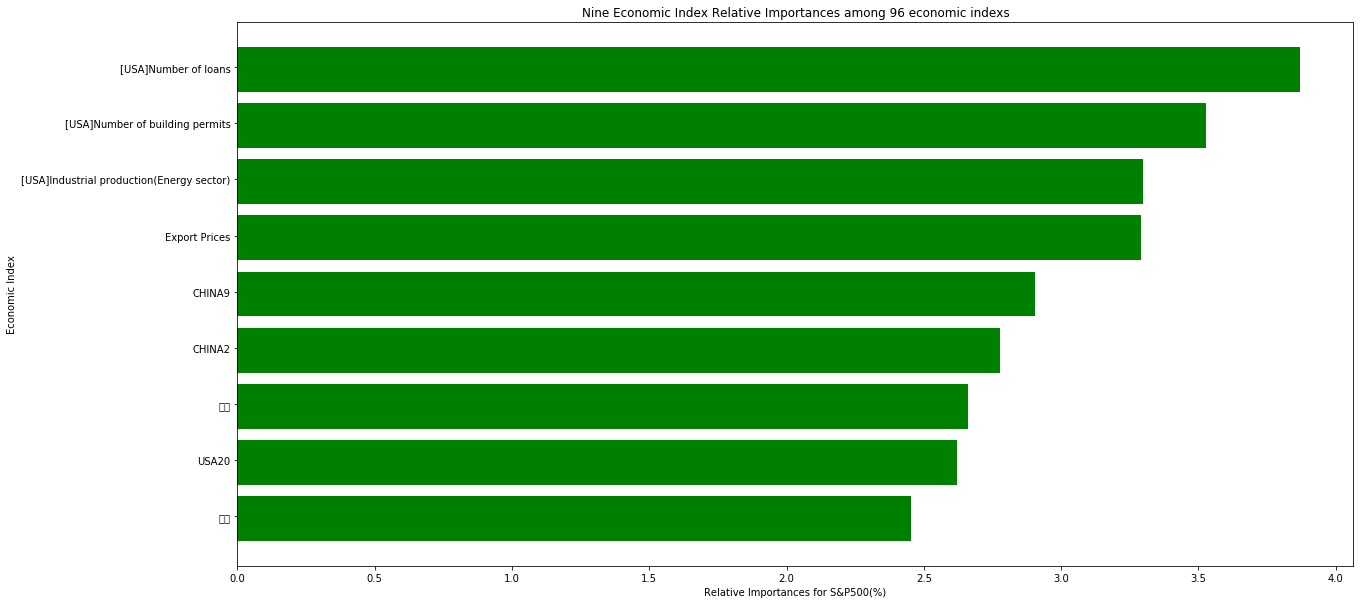

<Figure size 1440x1440 with 0 Axes>

In [128]:
X_grid_selector=['고고','USA20','ㅎㅎ','CHINA2','CHINA9',
                 'Export Prices',
                 '[USA]Industrial production(Energy sector)',
                 '[USA]Number of building permits','[USA]Number of loans']

feature_engineer=sorted(feature_importances,reverse=True)
feature_engineer=pd.DataFrame(feature_engineer)
feature_engineer=feature_engineer.iloc[[9,8,7,6,5,4,3,1,0]]
feature_engineer=list(feature_engineer[0]*100)                    
#Graph
fig, ax=plt.subplots()
width=0.4
plt.rc({'font.size':24})
index=np.arange(len(feature_engineer))
ax.barh(index, feature_engineer, color="green")
ax.set_yticks(index+width/10)
ax.set_yticklabels(X_grid_selector, minor=False)


plt.rc({'font.size':40})
plt.title('Nine Economic Index Relative Importances among 96 economic indexs')
plt.xlabel('Relative Importances for S&P500(%)')
plt.ylabel('Economic Index')
plt.figure(figsize=(20,20))
fig.set_size_inches(20,10)